# Synthetic data generation with VAE

Variational Auto Encoders are unsupervised learning conceptually similar to Auto encoders. Auto encoders are trained to learn to represent compressed version of the input in the latent space and be able to reconstruct back. VAEs are generative models that learn a probability distribution over the latent space. They model the input data as being generated from a set of latent variables that follow a prior distribution (usually a standard normal distribution).

<img src="images/VAE.png" width="650"/>

They have two components a) Encoder and b) Decoder. The encoder network in a VAE approximates the posterior distribution of the latent variables given the input data, while the decoder network maps the latent variables back to the original data space.


In [26]:
%load_ext autoreload
%autoreload 2
from utils import *
from vae import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import os
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
engine_data = get_engine_data()
train_test_sample_size = 10000
df = engine_data.sample(train_test_sample_size)
df

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
1383,42.0072,0.8400,100.0,445.00,549.62,1358.45,1127.43,3.91,5.72,138.39,...,131.00,2388.18,8099.73,9.3302,0.02,332,2212,100.00,10.71,6.3023
27885,42.0080,0.8412,100.0,445.00,549.41,1354.71,1127.23,3.91,5.72,138.78,...,130.63,2388.06,8087.59,9.4028,0.02,329,2212,100.00,10.60,6.3102
31820,10.0070,0.2500,100.0,489.05,604.85,1511.95,1325.57,10.52,15.50,393.80,...,370.71,2388.27,8126.05,8.6879,0.03,371,2319,100.00,28.24,17.0675
37911,0.0029,0.0000,100.0,518.67,642.43,1583.54,1406.71,14.62,21.61,554.72,...,522.31,2388.04,8141.26,8.4112,0.03,392,2388,100.00,38.95,23.4375
22403,35.0003,0.8400,100.0,449.44,556.82,1378.31,1148.85,5.48,8.01,194.60,...,182.70,2389.33,8132.35,9.3803,0.02,337,2223,100.00,14.72,8.7067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28848,35.0079,0.8409,100.0,449.44,556.06,1355.69,1131.36,5.48,8.00,194.93,...,183.19,2388.02,8059.59,9.3043,0.02,334,2223,100.00,14.78,8.9647
41874,25.0023,0.6204,60.0,462.54,537.03,1262.70,1055.72,7.05,9.03,174.98,...,164.68,2028.12,7870.88,10.9353,0.02,308,1915,84.93,14.21,8.5547
21880,42.0067,0.8413,100.0,445.00,549.29,1357.22,1130.62,3.91,5.71,138.51,...,130.36,2387.76,8073.91,9.4103,0.02,331,2212,100.00,10.52,6.3083
32364,0.0019,0.0000,100.0,518.67,642.47,1583.00,1393.46,14.62,21.61,554.19,...,522.26,2388.04,8140.73,8.3977,0.03,393,2388,100.00,38.92,23.3351


In [29]:
#Set hyper params
batch_size = 512
latent_dim = 256 
num_epochs = 150
lr=0.001

In [30]:
generator = train(df,batch_size,latent_dim,num_epochs,lr)

Epoch [1/150], Loss: 1503.0206
Epoch [2/150], Loss: 1219.9900
Epoch [3/150], Loss: 1165.7135
Epoch [4/150], Loss: 1128.1422
Epoch [5/150], Loss: 1087.1835
Epoch [6/150], Loss: 1034.8721
Epoch [7/150], Loss: 973.9662
Epoch [8/150], Loss: 915.4429
Epoch [9/150], Loss: 843.9470
Epoch [10/150], Loss: 756.5255
Epoch [11/150], Loss: 675.4807
Epoch [12/150], Loss: 599.7598
Epoch [13/150], Loss: 548.4934
Epoch [14/150], Loss: 518.8005
Epoch [15/150], Loss: 491.5116
Epoch [16/150], Loss: 460.5279
Epoch [17/150], Loss: 424.3286
Epoch [18/150], Loss: 386.7439
Epoch [19/150], Loss: 336.7506
Epoch [20/150], Loss: 280.2792
Epoch [21/150], Loss: 208.7399
Epoch [22/150], Loss: 123.0269
Epoch [23/150], Loss: 70.7763
Epoch [24/150], Loss: 73.8021
Epoch [25/150], Loss: 68.6071
Epoch [26/150], Loss: 70.6607
Epoch [27/150], Loss: 68.6527
Epoch [28/150], Loss: 67.2564
Epoch [29/150], Loss: 65.8033
Epoch [30/150], Loss: 70.0809
Epoch [31/150], Loss: 66.1204
Epoch [32/150], Loss: 65.6175
Epoch [33/150], Loss:

In [31]:
%%time
# Generate synthetic data
sample_size = 100
z = torch.randn(sample_size, latent_dim)
with torch.no_grad():
    synthetic_data = generator.decoder(z).detach().numpy()

synthetic_df = pd.DataFrame(synthetic_data, columns=reqd_cols)
synthetic_df

CPU times: user 1.58 ms, sys: 11 μs, total: 1.6 ms
Wall time: 1.23 ms


,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,24.443218,0.547899,97.443054,457.737701,555.700623,1368.070679,1137.770142,6.855364,8.971398,191.556107,...,181.001770,2321.685303,7891.604980,9.044074,0.068513,334.452179,2207.086914,97.364937,14.689982,8.391403
1,24.322542,0.438947,98.270348,464.119385,564.010132,1387.013550,1153.538330,7.009013,9.312520,195.151733,...,183.583298,2353.809326,8000.376465,8.886003,-0.102975,338.413879,2237.223877,98.726562,14.981994,9.266565
2,23.614529,0.569397,94.907776,446.818268,542.459351,1334.397705,1109.919312,7.092276,8.555023,187.139801,...,176.379227,2264.677734,7696.985352,8.719623,0.037324,326.142731,2152.450928,94.721985,14.535017,8.402874
3,24.502193,0.583249,99.111412,467.405548,567.134644,1394.722168,1159.907593,6.852930,9.567083,195.513321,...,184.485519,2367.251953,8047.123535,8.985190,-0.155473,340.737335,2249.696045,99.090233,15.309146,8.641367
4,24.276001,0.621544,96.388962,455.273346,552.956116,1360.668213,1131.650635,6.652244,8.636374,191.037857,...,180.338989,2308.907959,7848.037598,8.861379,0.101779,332.476501,2194.619629,96.849487,14.575357,9.063271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25.121714,0.655328,101.557358,476.711151,579.616760,1426.221069,1186.491699,7.469625,9.218452,200.580643,...,188.502457,2419.885498,8226.983398,9.267911,0.054097,348.272278,2300.406494,100.891075,15.106648,9.352280
96,26.458408,0.800822,105.113754,495.988495,602.270630,1482.627319,1232.903809,7.503109,9.692893,208.457840,...,195.275909,2516.418457,8551.969727,9.657002,0.021833,362.141388,2391.304932,105.531715,16.331625,9.491570
97,25.307312,0.638369,100.512314,472.599487,574.114563,1412.441772,1175.200195,6.996825,9.412783,198.304550,...,186.798096,2397.131836,8148.687988,9.182908,0.093925,345.722687,2278.870361,100.965317,15.047957,8.920233
98,24.495083,0.695648,97.756058,460.444427,558.946838,1376.892944,1145.177124,6.743385,9.286755,193.371689,...,182.149323,2336.022949,7939.732910,8.904296,-0.069890,336.427856,2220.779297,97.965324,15.532809,9.219784


In [50]:
from pathlib import Path
metrics_dir = 'metrics'
algo_name = 'vae'
original_df_file = f'{metrics_dir}/original_df.csv'
synthetic_df_file = f'{metrics_dir}/{algo_name}_df.csv'

if Path(original_df_file).is_file():
    original_df = pd.read_csv(original_df_file)
else:
    original_df = engine_data.sample(len(synthetic_df))
    original_df = original_df.reset_index(inplace=False,drop=True)
    original_df.to_csv(original_df_file, index=False,header=True) 

synthetic_df.to_csv(synthetic_df_file, index=False,header=True) 
original_df

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,34.9983,0.8400,100.0,449.44,555.78,1363.97,1125.39,5.48,8.00,194.72,...,182.94,2388.13,8073.91,9.3152,0.02,333,2223,100.00,14.72,8.8547
1,24.9984,0.6200,60.0,462.54,537.01,1256.09,1045.64,7.05,9.03,175.57,...,165.18,2028.40,7886.30,10.9136,0.02,306,1915,84.93,14.55,8.5935
2,42.0071,0.8401,100.0,445.00,549.81,1352.27,1124.99,3.91,5.71,138.57,...,130.77,2387.89,8080.70,9.3821,0.02,331,2212,100.00,10.62,6.4156
3,0.0020,0.0000,100.0,518.67,642.81,1589.90,1407.62,14.62,21.61,553.10,...,521.52,2388.13,8138.29,8.4215,0.03,393,2388,100.00,38.97,23.3654
4,9.9989,0.2517,100.0,489.05,604.29,1496.64,1304.30,10.52,15.49,393.91,...,371.99,2388.10,8139.17,8.6337,0.03,368,2319,100.00,28.62,17.0607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0075,0.2507,100.0,489.05,604.94,1499.84,1310.79,10.52,15.49,394.34,...,371.37,2388.16,8132.50,8.6452,0.03,369,2319,100.00,28.54,17.0885
96,35.0002,0.8404,100.0,449.44,555.52,1363.91,1129.15,5.48,8.00,195.68,...,183.46,2388.07,8066.44,9.2779,0.02,332,2223,100.00,14.87,8.9074
97,35.0048,0.8400,100.0,449.44,557.03,1376.97,1155.05,5.48,8.01,194.01,...,182.99,2389.65,8143.37,9.4200,0.02,338,2223,100.00,14.67,8.8234
98,10.0074,0.2517,100.0,489.05,604.93,1509.62,1315.22,10.52,15.49,394.45,...,371.01,2388.19,8152.99,8.6958,0.03,370,2319,100.00,28.68,17.1613


In [51]:
real_stats_df, synthetic_stats_df, comparison_stats_df = compute_stats(original_df,synthetic_df)
print("Original data stat")
display(real_stats_df)

print("\nSynthetic stat")
display(synthetic_stats_df)

print("\nComparison:")
display(comparison_stats_df)

Original data stat


,Min,Max,Mean,Std
setting1,0.0000,42.0080,21.863409,14.095098
setting2,0.0000,0.8419,0.539277,0.307351
setting3,60.0000,100.0000,94.800000,13.452137
s1,445.0000,518.6700,476.265200,25.222571
s2,536.3100,643.2700,584.522100,36.014661
s3,1247.0600,1597.7700,1433.442300,102.663913
s4,1040.5100,1418.2100,1220.112700,115.103377
s5,3.9100,14.6200,8.486500,3.421230
s6,5.7100,21.6100,12.294100,5.165116
s7,137.9500,555.4200,301.459000,139.818840



Synthetic stat


,Min,Max,Mean,Std
setting1,23.236387,26.458408,24.815201,0.681082
setting2,0.206421,1.052213,0.629765,0.191207
setting3,93.552124,106.206055,99.524895,2.554512
s1,440.535187,499.569763,468.509247,11.693382
s2,534.476990,606.644775,568.874146,14.228407
s3,1314.666626,1493.001953,1399.899414,34.961544
s4,1094.075928,1241.671265,1164.201294,29.106440
s5,6.456122,7.962306,7.127295,0.293681
s6,8.246767,9.774734,9.143663,0.347193
s7,184.649811,209.654266,196.656876,4.954796



Comparison:


,KLD Mean,WD Mean
Comparison,0.301497,38.203531


In [52]:
kl_divs = kld(original_df,synthetic_df)
kl_divs

[{'setting1': 2.552776336669922},
 {'setting2': 0.21105217933654785},
 {'setting3': 1.240374207496643},
 {'s1': 0.42298662662506104},
 {'s2': 0.600173830986023},
 {'s3': 0.6880388259887695},
 {'s4': 1.0236401557922363},
 {'s5': 2.037074565887451},
 {'s6': 2.3862180709838867},
 {'s7': 3.118727445602417},
 {'s8': 0.4946443438529968},
 {'s9': 0.15568912029266357},
 {'s10': 0.08847503364086151},
 {'s11': 0.6118404865264893},
 {'s12': 3.123476982116699},
 {'s13': 0.3719688057899475},
 {'s14': 1.6616497039794922},
 {'s15': 0.5740048885345459},
 {'s16': 184.27513122558594},
 {'s17': 0.7535756826400757},
 {'s18': 0.4958433210849762},
 {'s19': 0.3620089888572693},
 {'s20': 2.753504514694214},
 {'s21': 2.5678153038024902}]

In [53]:
#provides statstic and p value for each field
ks_test(original_df,synthetic_df)

[{'setting1': (0.54, 1.0245697148897385e-13)},
 {'setting2': (0.33, 3.211428734211389e-05)},
 {'setting3': (0.48, 8.448372017533173e-11)},
 {'s1': (0.5, 1.0024645454361508e-11)},
 {'s2': (0.53, 3.35710076793659e-13)},
 {'s3': (0.52, 1.070075869779788e-12)},
 {'s4': (0.54, 1.0245697148897385e-13)},
 {'s5': (0.54, 1.0245697148897385e-13)},
 {'s6': (0.54, 1.0245697148897385e-13)},
 {'s7': (0.54, 1.0245697148897385e-13)},
 {'s8': (0.4, 1.5550790371345692e-07)},
 {'s9': (0.39, 3.5690338557186834e-07)},
 {'s10': (0.26, 0.002219935934558366)},
 {'s11': (0.42, 2.749465483696122e-08)},
 {'s12': (0.54, 1.0245697148897385e-13)},
 {'s13': (0.47, 2.359168035084735e-10)},
 {'s14': (0.35, 7.850159128072286e-06)},
 {'s15': (0.3, 0.0002248739317492479)},
 {'s16': (0.51, 3.319419024623016e-12)},
 {'s17': (0.53, 3.35710076793659e-13)},
 {'s18': (0.4, 1.5550790371345692e-07)},
 {'s19': (0.45, 1.7047967801006258e-09)},
 {'s20': (0.54, 1.0245697148897385e-13)},
 {'s21': (0.54, 1.0245697148897385e-13)}]

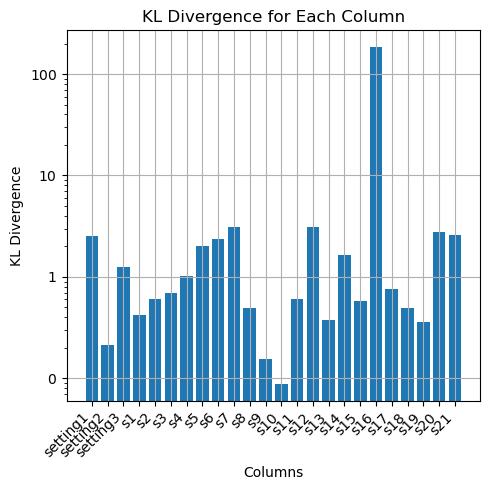

In [54]:
show_n_save(algo_name,'kld',original_df, synthetic_df)

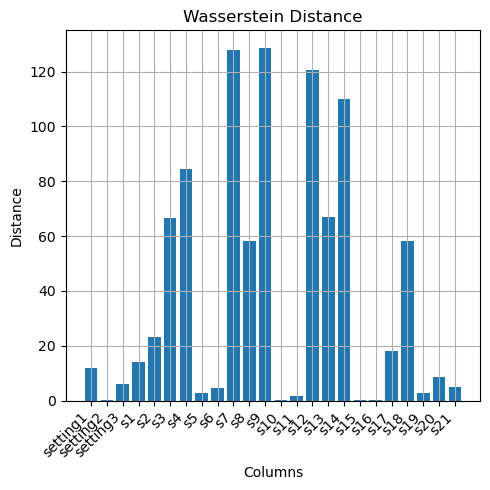

In [55]:
show_n_save(algo_name,'wd',original_df, synthetic_df)

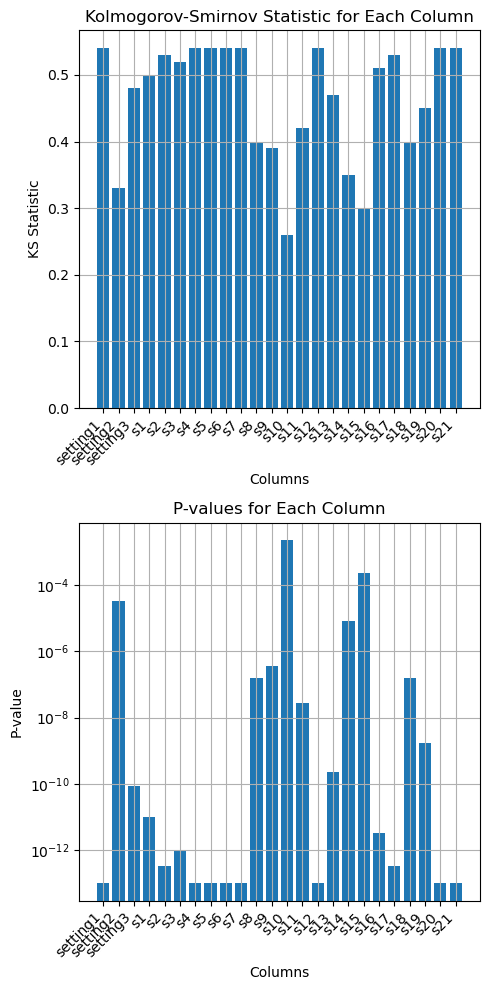

In [56]:
show_n_save(algo_name,'ks_test',original_df, synthetic_df)

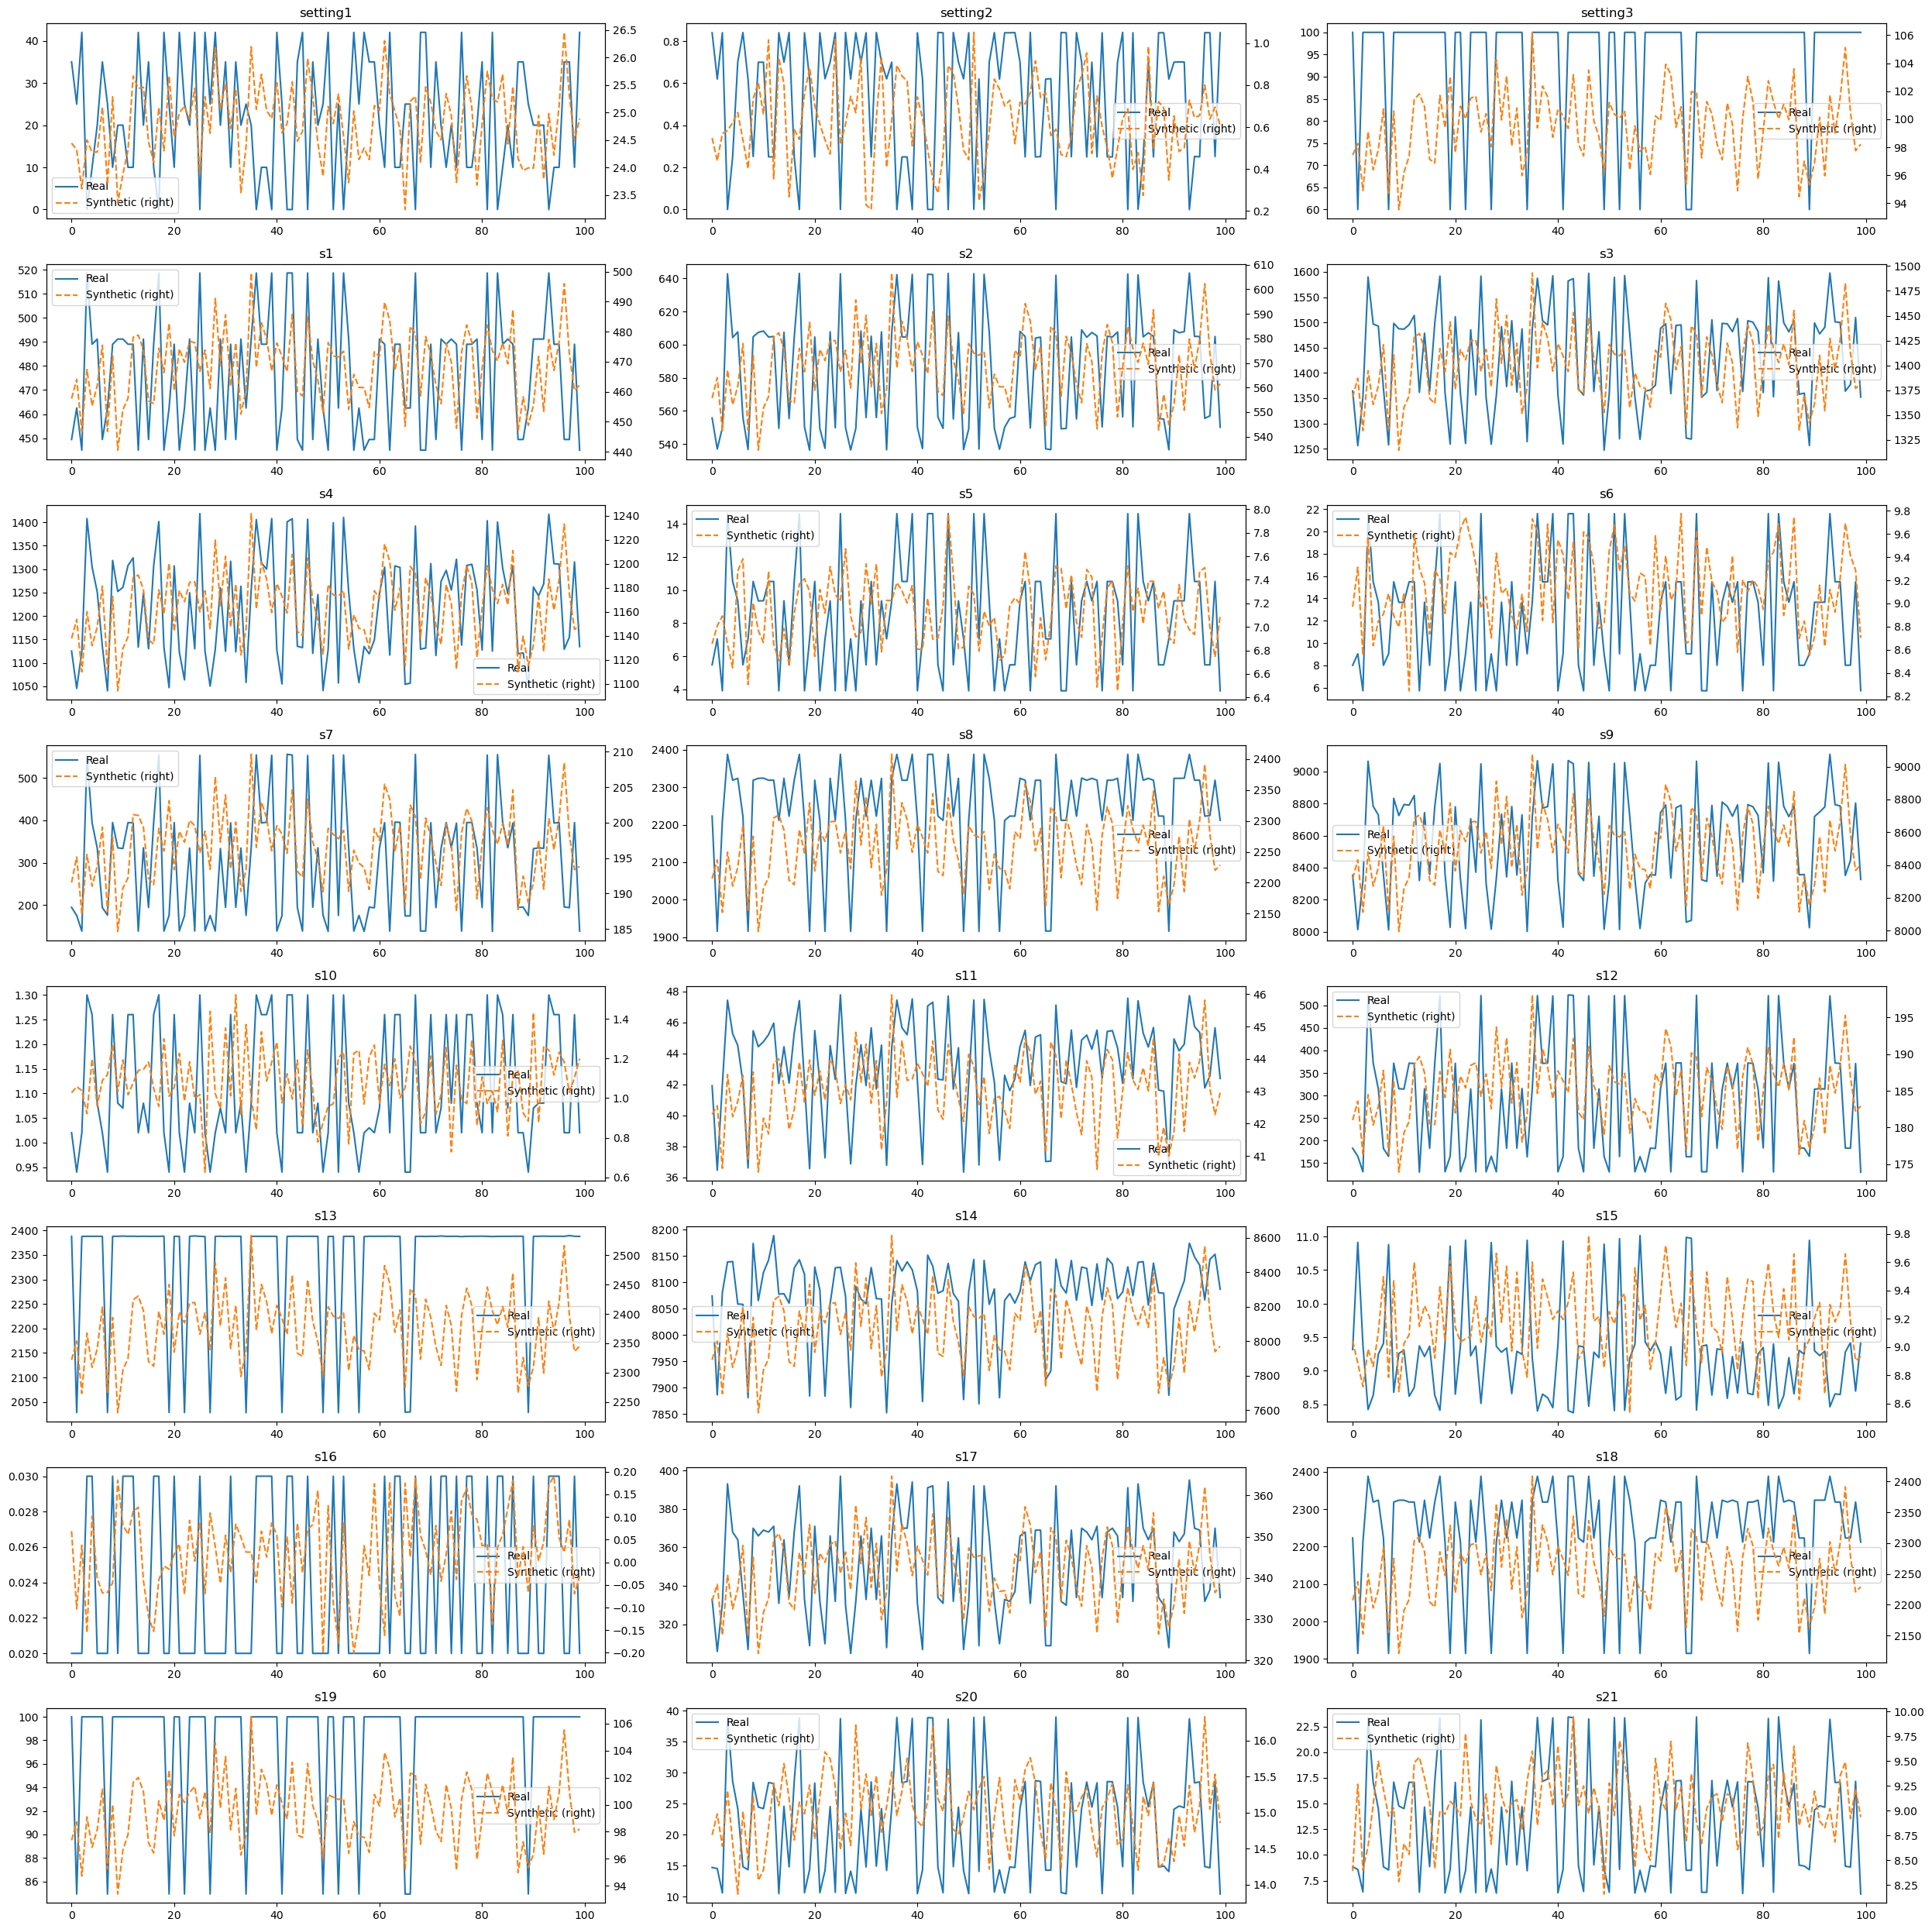

In [57]:
show_n_save(algo_name,'distribs',original_df, synthetic_df)

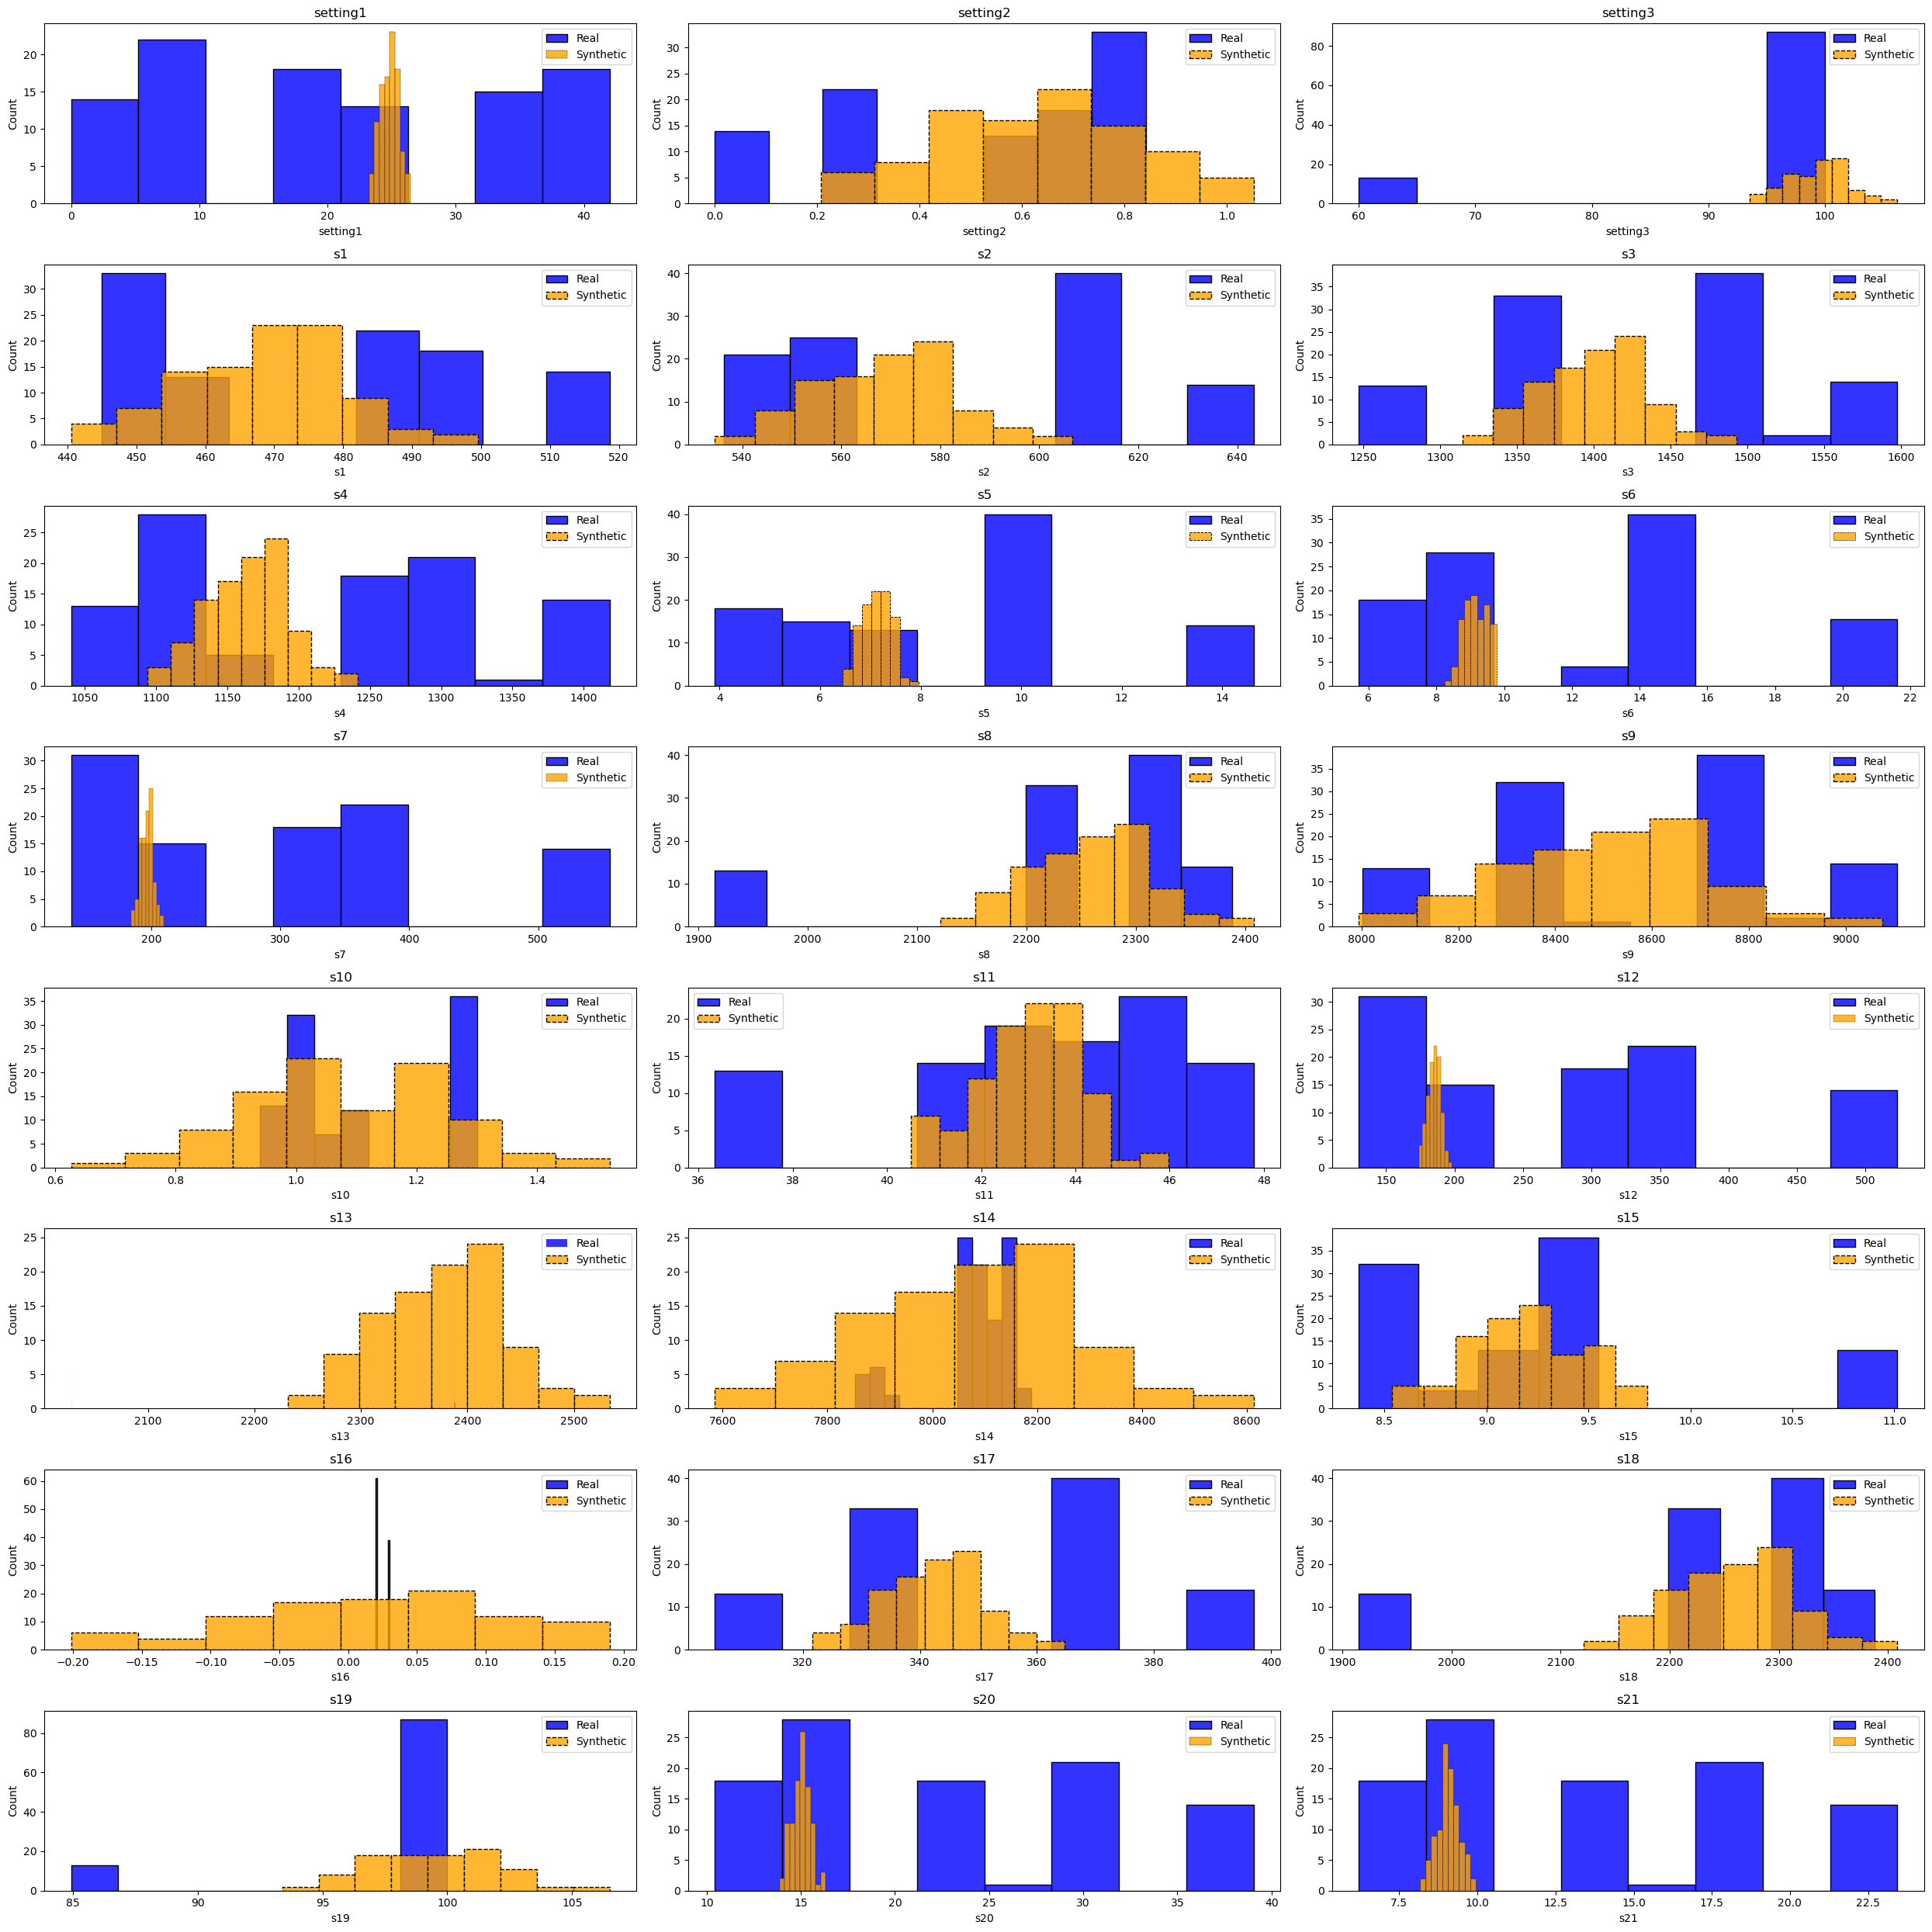

In [62]:
show_n_save(algo_name,'hist',original_df, synthetic_df)

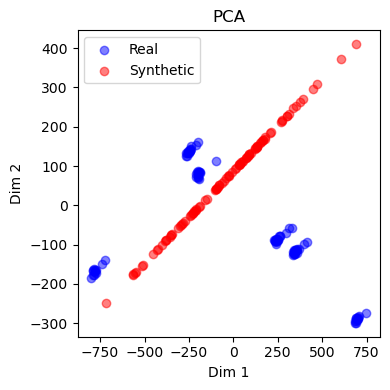

In [59]:
show_n_save(algo_name,'pca',original_df, synthetic_df)

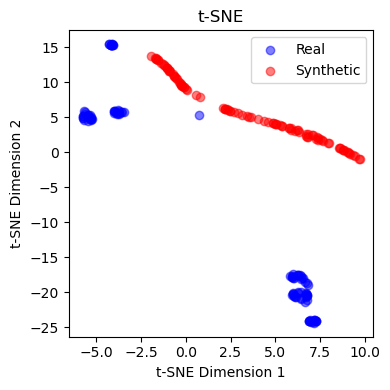

In [61]:
show_n_save(algo_name,'tsne',original_df, synthetic_df)